<a href="https://colab.research.google.com/github/jpthirumalai/aiml/blob/master/Thiru_Face_detection_Questions_Project_CV_AIML_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change current working directory to project folder (1 mark)

In [2]:
import os
#check present working directory
cwd = !pwd
print("Current folder: ",cwd)
%cd '/content/drive/My Drive/AIML/AI/CNNProject/'
cwd = !pwd
print("Current working directory after seting proj folder: ",cwd)

Current folder:  ['/content']
/content/drive/My Drive/AIML/AI/CNNProject
Current working directory after seting proj folder:  ['/content/drive/My Drive/AIML/AI/CNNProject']


### Load the "images.npy" file (4 marks)
- This file contains images with details of bounding boxes

In [3]:
!ls

 1704.04861.pdf
'About Face Detection and Recognition-1.pdf'
 eval_tools.zip
 Face_detection_Questions_Project_CV_AIML_Online.ipynb
 images.npy
 model-0.35.h5
 model-0.41.h5
 model-0.44.h5
 model-0.46.h5
 model-0.48.h5
 model-0.50.h5
 model-0.51.h5
 model-0.54.h5
 model-0.58.h5
 model-0.61.h5
 model-0.65.h5
 model-0.68.h5
 model-0.70.h5
 model-0.71.h5
 model-0.73.h5
 model-0.74.h5
 model-0.76.h5
 model-0.88.h5
 model-0.90.h5
 model-0.92.h5
 model-1.00.h5
 model-1.02.h5
 model-1.03.h5
 model-1.16.h5
 model-1.20.h5
 model-1.23.h5
 model-1.33.h5
 model-1.42.h5
 model-1.54.h5
 model-1.89.h5
 model-1.92.h5
 model-1.95.h5
 model-2.01.h5
 model-2.05.h5
 model-2.82.h5
 model-2.92.h5
 model-5.08.h5
 Submission_example.zip
 thiru_profile.jpg
 thiru_profile.png
 unet
 wider_face_split.zip
 WIDER_test.zip
 WIDER_train.zip
'WIDER_train.zip (Unzipped Files)'
 WIDER_val.zip


In [4]:
import tensorflow
print(tensorflow.__version__)

1.15.0


In [5]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

loaded_array = np.load('images.npy',allow_pickle=True)

#### Add your code here ####

Using TensorFlow backend.


In [6]:
loaded_array.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (4 marks)

In [7]:
#Verifying the images given in "images.npy" 
print(len(loaded_array[408,0]))
print(len(loaded_array[2,0]))
# all 0 index elements are images and index 1 elements list 
print(loaded_array[408,0][1].shape)
print(len(loaded_array[408,0][1]))
print(loaded_array[408,1][9])

493
240
(656, 3)
656
{'label': ['Face'], 'notes': '', 'points': [{'x': 0.8033536585365854, 'y': 0.5152129817444219}, {'x': 0.850609756097561, 'y': 0.6267748478701826}], 'imageWidth': 656, 'imageHeight': 493}


Label:  ['Face']
(493, 656, 3)


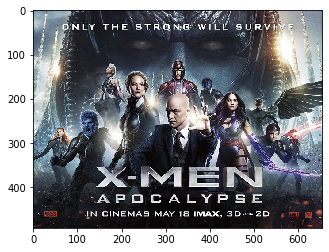

In [8]:
#### Add your code here ####
import matplotlib.pyplot as plt
test_img = loaded_array[408,0]
test_imginfo = loaded_array[408,1][1]
print('Label: ', test_imginfo['label'])
print(test_img.shape)
#Printing one sample image with lablel
imgplot = plt.imshow(test_img);


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
data = loaded_array

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH)) #<<-----created masks the label
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3)) #<<-----created X_train
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [12]:
#### Add your code here ####
print("Shape of X_train {0}".format(X_train.shape))

Shape of X_train (409, 224, 224, 3)


In [13]:
#### Add your code here ####
print("Shape of mask {0}".format(masks.shape))

Shape of mask (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

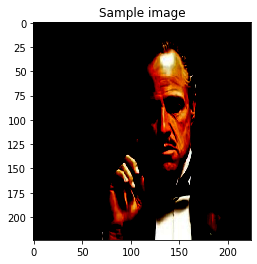

In [14]:
from matplotlib import pyplot
n = 10
print(X_train[n])
plt.title("Sample image")
pyplot.imshow(X_train[n])

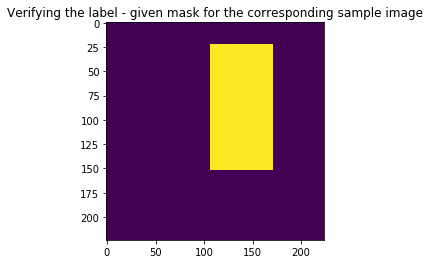

In [15]:
plt.title("Verifying the label - given mask for the corresponding sample image")
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet #<<--adding mobile net as model
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

ALPHA = 1 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

HEIGHT_CELLS = 28
WIDTH_CELLS = 28

CELL_WIDTH = IMAGE_WIDTH / WIDTH_CELLS
CELL_HEIGHT = IMAGE_HEIGHT / HEIGHT_CELLS


PATIENCE = 10

THREADS = 1



In [17]:
print(masks.shape)

(409, 224, 224)


In [0]:



def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet") #include_top is set to false, weights imagenet #### Add your code here ####
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####
    block1 = model.get_layer("conv_pw_5_relu").output   
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)

    return Model(inputs=model.input, outputs=x)#### Add your code here ####

### Call the create_model function

In [19]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (5 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [22]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam
import cv2

model = create_model(False)
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
____________________________________________________________________________________________

(array([ 23,  23,  23, ..., 151, 151, 151]), array([107, 108, 109, ..., 169, 170, 171]))
(409, 224, 224)


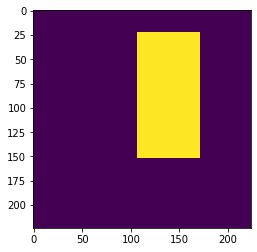

In [23]:
plt.imshow(masks[10])
arr = masks[10].nonzero()
print(arr)
print(masks.shape)
sample = masks[10]

In [24]:
noimgs,imgw,imgh =masks.shape
noimgs

409

Before resize: (409, 224, 224)
After resize: (409, 28, 28)


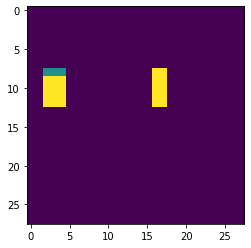

In [25]:
train_datagen = X_train
print("Before resize:",masks.shape)
noimgs,imgw,imgh =masks.shape
mask28 = np.empty([409,28,28]) 
for index in range(noimgs):
  mask_img = masks[index]
  mask_img.shape
  mask_img = cv2.resize(mask_img, (28, 28)) #creating mask 28x28 from 224x224
  mask28[index,:,:] = np.squeeze(mask_img)

print("After resize:",mask28.shape)
plt.imshow(mask28[0])
validation_datagen=mask28

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient]) # compile using loss as difined function, dice_coefficient as defined function & optimizer as Adam just defined in the previous line


### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
EPOCHS = 5
BATCH_SIZE = 1

In [28]:
#### Add your code here ####
model.fit(X_train, mask28, callbacks=[checkpoint, reduce_lr, stop],batch_size=BATCH_SIZE,epochs=EPOCHS )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 409 samples
Epoch 1/5

Epoch 00001: loss improved from inf to 3.01883, saving model to model-3.02.h5
  1/409 [..............................] - ETA: 40:10 - loss: 3.0188 - dice_coefficient: 0.1149
Epoch 00001: loss improved from 3.01883 to 2.32701, saving model to model-2.33.h5
  2/409 [..............................] - ETA: 20:57 - loss: 2.6729 - dice_coefficient: 0.1674
Epoch 00001: loss did not improve from 2.32701

Epoch 00001: loss did not improve from 2.32701

Epoch 00001: loss did not improve from 2.32701

Epoch 00001: loss improved from 2.32701 to 1.92226, saving model to model-1.92.h5
  6/409 [..............................] - ETA: 8:04 - loss: 2.9468 - dice_coefficient: 0.1579 
Epoch 00001: loss did not improve from 1.92226

Epoch 00001: loss did not improve from 1.92226

Epoch 00001: loss did not improve from 1.92226

Epoch 00001: loss did not improve from 1.92226
 10/409 [

Epoch 00005: loss improved from 0.40530 to <font color="red">0.34862, saving model to model-0.35.h5</font>
275/409 [===================>..........] - ETA: 2s - loss: 1.1702 - dice_coefficient: 0.4728
Epoch 00005: loss did not improve from 0.34862
<h2> <font color="blue">Getting the best-fit file weights here stored in the file <font><font color="red">model-0.35.h5</font>

### Get the predicted mask for a sample image   (5 marks)

In [0]:
import cv2
import numpy as np

from keras.applications.mobilenet import preprocess_input
from google.colab.patches import cv2_imshow

WEIGHTS_FILE = "model-0.35.h5"
model = create_model()
model.load_weights(WEIGHTS_FILE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


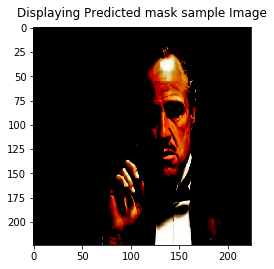

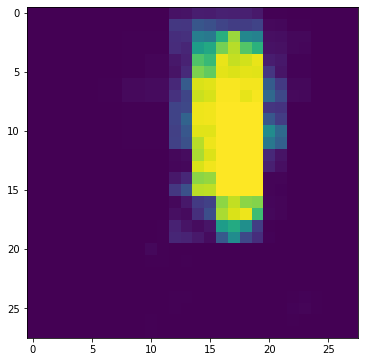

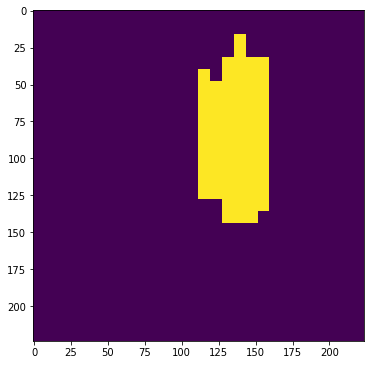

In [123]:
n = 10
sample_image = X_train[n]

THRESHOLD = 0.8
EPSILON = 0.05
plt.title('Verifying the sample Image', y=1.02, fontsize=12)
plt.imshow(sample_image)

imgcopy = sample_image.copy()
# print(sample_image.shape)
# image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
# feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

region = model.predict(x=np.array([sample_image]))[0]
plt.title('Displaying Predicted mask sample Image', y=1.02, fontsize=12)
plt.figure(figsize=(28,28))
plt.subplot(4,1,1)
plt.imshow(region)
output = np.zeros(imgcopy.shape[:2], dtype=np.uint8)

print(output)
for i in range(region.shape[1]):
    for j in range(region.shape[0]):
        # print("Verifiying threshold region[{0}][{1}] is {2}".format(i,j,region[i][j]))
        if region[i][j] > THRESHOLD:
            # print("exceeding threshold region[{0}][{1}]".format(i,j))
            x = int(CELL_WIDTH * j * imgcopy.shape[1] / IMAGE_WIDTH)
            y = int(CELL_HEIGHT * i * imgcopy.shape[0] / IMAGE_HEIGHT)
            x2 = int(CELL_WIDTH * (j + 1) * imgcopy.shape[1] / IMAGE_WIDTH)
            y2 = int(CELL_HEIGHT * (i + 1) * imgcopy.shape[0] / IMAGE_HEIGHT)
            # cv2.rectangle(imgcopy, (x, y), (x2, y2), (0, 255, 0), 1)

            output[y:y2,x:x2] = 1
plt.figure(figsize=(28,28))
plt.subplot(4,1,2)
plt.imshow(output)


#### Add your code here ####

### Impose the mask on the image (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


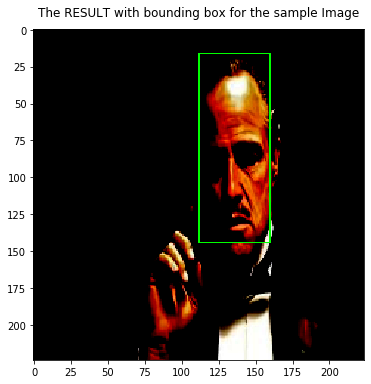

In [124]:
contours, hierarchy = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(imgcopy, (x, y), (x + w, y + h), (0, 255, 0), 1)
plt.figure(figsize=(28,28))
plt.subplot(4,1,3)
plt.title('The RESULT with bounding box for the sample Image', y=1.02, fontsize=12)
plt.imshow(imgcopy)

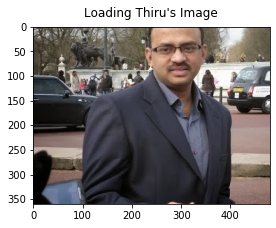

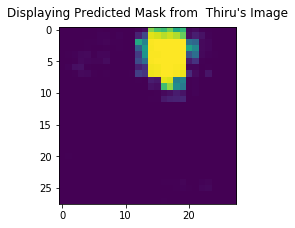

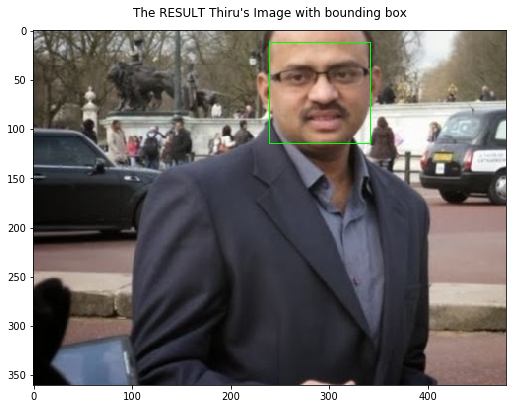

In [125]:
WEIGHTS_FILE = "model-0.43.h5"
THRESHOLD = 0.949
EPSILON = 0.0

filename = 'thiru_profile.jpg'

unscaled = cv2.imread(filename)
unscaled = cv2.cvtColor(unscaled, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
plt.title('Loading Thiru\'s Image', y=1.02, fontsize=12)
plt.imshow(unscaled)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

# print(sample_image.shape)
# image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
# feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

region = model.predict(x=np.array([feat_scaled]))[0]
plt.figure(figsize=(15,15))
plt.subplot(4,1,2)
plt.title('Displaying Predicted Mask from  Thiru\'s Image', y=1.02, fontsize=12)

plt.imshow(region)
output2 = np.zeros(unscaled.shape[:2], dtype=np.uint8)
for i in range(region.shape[1]):
    for j in range(region.shape[0]):
        if region[i][j] > THRESHOLD:
            x = int(CELL_WIDTH * j * unscaled.shape[1] / IMAGE_WIDTH)
            y = int(CELL_HEIGHT * i * unscaled.shape[0] / IMAGE_HEIGHT)
            x2 = int(CELL_WIDTH * (j + 1) * unscaled.shape[1] / IMAGE_WIDTH)
            y2 = int(CELL_HEIGHT * (i + 1) * unscaled.shape[0] / IMAGE_HEIGHT)
            #cv2.rectangle(unscaled, (x, y), (x2, y2), (0, 255, 0), 1)

            output2[y:y2,x:x2] = 1

contours, hierarchy = cv2.findContours(output2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(unscaled, (x, y), (x + w, y + h), (0, 255, 0), 1)
plt.figure(figsize=(30,30))
plt.subplot(4,1,3)
plt.title('The RESULT Thiru\'s Image with bounding box', y=1.02, fontsize=12)
plt.imshow(unscaled)